üìä ÂàÜÁ±ªÊä•ÂëäÔºàClassification ReportÔºâ:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       532
           1       0.99      1.00      0.99      1254

    accuracy                           0.99      1786
   macro avg       0.99      0.99      0.99      1786
weighted avg       0.99      0.99      0.99      1786



C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:53] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


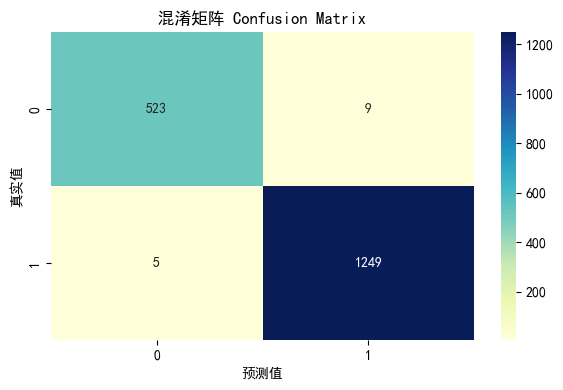

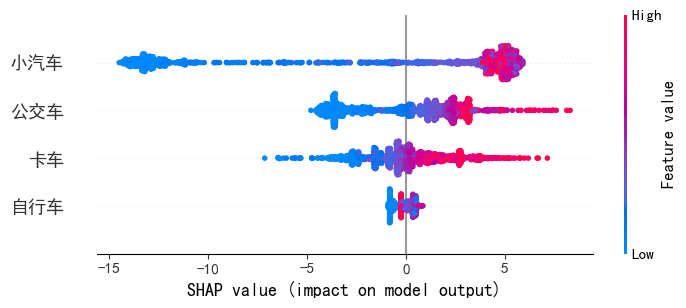

C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


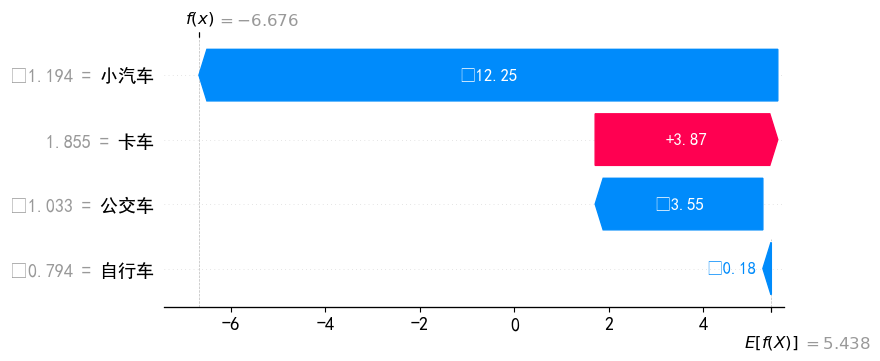

In [3]:
# üö¶ Day 2Ôºö‰∫§ÈÄöÁä∂ÊÄÅÈ¢ÑÊµãËøõÈò∂ÔºàXGBoost + SHAPÔºâ

# ‚úÖ 1. ÂØºÂÖ•ÊâÄÈúÄÂ∫ì
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']        # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False    

# Ê®°Âûã‰∏éËß£ÈáäÂô®
from xgboost import XGBClassifier
import shap

# ‚úÖ 2. ËØªÂèñ‰∫§ÈÄöÊï∞ÊçÆ
df = pd.read_csv("‰∫§ÈÄöÊï∞ÊçÆ_‰∏§‰∏™Êúà_Âê´Êó∂Èó¥Â≠óÊÆµ.csv")

# ‚úÖ 3. ÊûÑÈÄ†ÁõÆÊ†áÂàóÔºàÂ¶ÇÊûúÊ≤°Êúâ status ÂàóÔºâ
df['status'] = ((df['Â∞èÊ±ΩËΩ¶Êï∞Èáè'] + df['ÂÖ¨‰∫§ËΩ¶Êï∞Èáè'] + df['Âç°ËΩ¶Êï∞Èáè']) > 60).astype(int)

# ‚úÖ 4. ÁâπÂæÅÈÄâÊã©
feature_cols = ['Â∞èÊ±ΩËΩ¶Êï∞Èáè', 'Âç°ËΩ¶Êï∞Èáè', 'ÂÖ¨‰∫§ËΩ¶Êï∞Èáè', 'Ëá™Ë°åËΩ¶Êï∞Èáè']
X = df[feature_cols]
y = df['status']

# ‚úÖ 5. ÁâπÂæÅÊ†áÂáÜÂåñÔºàXGBoost ÂèØÈÄâÊ†áÂáÜÂåñÔºâ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ‚úÖ 6. ÂàíÂàÜËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ‚úÖ 7. Âª∫Á´ã XGBoost Ê®°Âûã
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# ‚úÖ 8. Ê®°ÂûãËØÑ‰º∞
y_pred = xgb_model.predict(X_test)
print("üìä ÂàÜÁ±ªÊä•ÂëäÔºàClassification ReportÔºâ:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ê∑∑Ê∑ÜÁü©Èòµ Confusion Matrix')
plt.xlabel('È¢ÑÊµãÂÄº')
plt.ylabel('ÁúüÂÆûÂÄº')
plt.tight_layout()
plt.show()

# ‚úÖ 9. ‰ΩøÁî® SHAP ËøõË°åÊ®°ÂûãËß£Èáä
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# ‚úÖ 10. SHAP Ëß£ÈáäÂõæÔºàÁâπÂæÅÈáçË¶ÅÊÄß + ÂΩ±ÂìçÊñπÂêëÔºâ
X_named = pd.DataFrame(X_test, columns=['Â∞èÊ±ΩËΩ¶', 'Âç°ËΩ¶', 'ÂÖ¨‰∫§ËΩ¶', 'Ëá™Ë°åËΩ¶'])
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_named)
shap.plots.beeswarm(shap_values)


# ‚úÖ 11. Ëß£ÈáäÂçï‰∏™Ê†∑Êú¨È¢ÑÊµãÁªìÊûúÔºà‰∏æ‰æãÁ¨¨5‰∏™Ôºâ
shap.plots.waterfall(shap_values[5], max_display=10)  # ÁÄëÂ∏ÉÂõæÔºöÂ±ïÁ§∫ÁâπÂæÅÂ¶Ç‰ΩïÊé®Âä®È¢ÑÊµãËæìÂá∫
